In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import random as rn
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D,GlobalAvgPool2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.optimizers import Adam
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [2]:
labels = os.listdir('../input/melanoma/DermMel/train_sep')
print(labels)

['Melanoma', 'NotMelanoma']


In [3]:
num = []
for label in labels:
    path = '../input/melanoma/DermMel/train_sep/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    print('\n', label.upper())
    for image_path in folder_data:
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')


 MELANOMA
there are  5341  images in  Melanoma class

 NOTMELANOMA
there are  5341  images in  NotMelanoma class


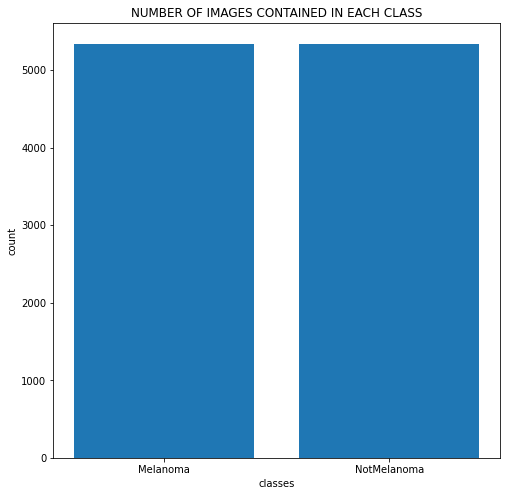

In [4]:
plt.figure(figsize = (8,8))
plt.bar(labels, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.ylabel('count')
plt.show()


In [5]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = '../input/melanoma/DermMel/train_sep/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path,cv2.IMREAD_COLOR)
        image_resized = cv2.resize(image, (64,64))
        x_data.append(np.array(image_resized))
        y_data.append(label)

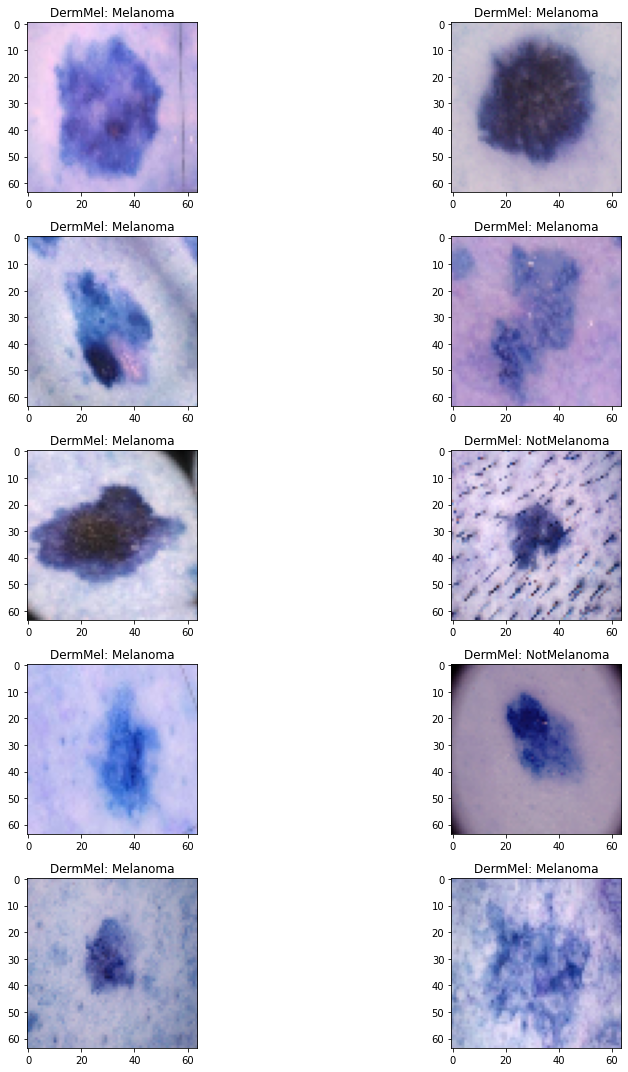

In [6]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(y_data))
        ax[i,j].imshow(x_data[l])
        ax[i,j].set_title('DermMel: '+y_data[l])
        
plt.tight_layout()

In [7]:
x_data = np.array(x_data)

y_data = np.array(y_data)

print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)


the shape of X is:  (10682, 64, 64, 3) and that of Y is:  (10682,)


In [8]:
le=LabelEncoder()
Y=le.fit_transform(y_data)
Y=to_categorical(Y,2)
x_data = x_data/255   #standarization 
Y.shape

(10682, 2)

In [9]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (64,64,3)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(2, activation = "sigmoid"))



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [23]:
model.compile(optimizer = Adam(learning_rate=0.001),
              loss='categorical_crossentropy',metrics=['acc'])


In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               67109120  
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 5

In [12]:
test_label = os.listdir('../input/melanoma/DermMel/valid')
print(test_label)

['Melanoma', 'NotMelanoma']


In [13]:
x_test =[]
y_test = []

for label in test_label:
    path = '../input/melanoma/DermMel/valid/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path,cv2.IMREAD_COLOR)
        image_resized = cv2.resize(image, (64,64))
        x_test.append(np.array(image_resized))
        y_test.append(label)


In [14]:
x_test = np.array(x_test)
x_test = x_test/255
y_test = np.array(y_test)
le = LabelEncoder()
y = le.fit_transform(y_test)
y = to_categorical(y,2)

In [15]:
x_test.shape,y.shape


((3562, 64, 64, 3), (3562, 2))

In [16]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='auto')


In [24]:
History = model.fit(x_data,Y,epochs = 1000, validation_data = (x_test,y),
                    verbose = 1,callbacks=[early_stop])


Epoch 1/1000
334/334 [==============================] - 164s 489ms/step - loss: 0.4124 - acc: 0.8145 - val_loss: 0.3801 - val_acc: 0.8302
Epoch 2/1000
334/334 [==============================] - 163s 489ms/step - loss: 0.2003 - acc: 0.9192 - val_loss: 0.4835 - val_acc: 0.8200
Epoch 3/1000
334/334 [==============================] - 163s 487ms/step - loss: 0.1146 - acc: 0.9560 - val_loss: 0.5362 - val_acc: 0.8316
Epoch 4/1000
334/334 [==============================] - 163s 488ms/step - loss: 0.0690 - acc: 0.9746 - val_loss: 0.6186 - val_acc: 0.8310
Epoch 5/1000
334/334 [==============================] - 163s 487ms/step - loss: 0.0397 - acc: 0.9875 - val_loss: 0.5536 - val_acc: 0.8223
Epoch 6/1000
334/334 [==============================] - 163s 489ms/step - loss: 0.0322 - acc: 0.9889 - val_loss: 0.8480 - val_acc: 0.8257
Epoch 7/1000
334/334 [==============================] - 163s 487ms/step - loss: 0.0177 - acc: 0.9936 - val_loss: 0.8395 - val_acc: 0.8352
Epoch 8/1000
334/334 [============

In [18]:
datagen = ImageDataGenerator(
        rotation_range=90,
        featurewise_center=True,
        featurewise_std_normalization=True,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

datagen.fit(x_data)

val_datagen = ImageDataGenerator(
        rotation_range=90,
        featurewise_center=True,
        featurewise_std_normalization=True,
         width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_datagen.fit(x_test)


In [19]:
History = model.fit_generator(datagen.flow(x_data,Y, batch_size=32),
                              epochs = 1000, validation_data = val_datagen.flow(x_test,y,batch_size=32),
                              verbose = 1, steps_per_epoch=x_data.shape[0] // 32,
                              callbacks=[early_stop])


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
333/333 [==============================] - 160s 479ms/step - loss: 1.0296 - acc: 0.6944 - val_loss: 0.5548 - val_acc: 0.7302
Epoch 2/100
333/333 [==============================] - 177s 532ms/step - loss: 0.5063 - acc: 0.7455 - val_loss: 0.6675 - val_acc: 0.6173
Epoch 3/100
333/333 [==============================] - 176s 528ms/step - loss: 0.4552 - acc: 0.7845 - val_loss: 0.6277 - val_acc: 0.6505
Epoch 5/100
333/333 [==============================] - 177s 532ms/step - loss: 0.4276 - acc: 0.7984 - val_loss: 0.6812 - val_acc: 0.6196
Epoch 6/100
333/333 [==============================] - 177s 531ms/step - loss: 0.4127 - acc: 0.8108 - val_loss: 0.6656 - val_acc: 0.6443
Epoch 7/100
333/333 [==============================] - 176s 528ms/step - loss: 0.4024 - acc: 0.8171 - val_loss: 0.7095 - val_acc: 0.5924
Epoch 8/100
333/333 [==============================] - 177s 531ms/step - loss: 0.3866 - acc: 0.8260 - val_loss: 0.8290 - val_acc: 0.5542
Epoch 00008: early stopping


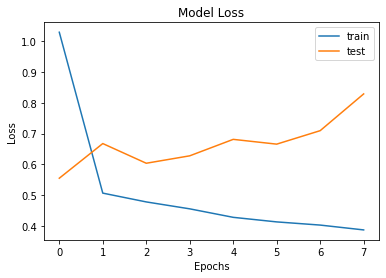

In [20]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


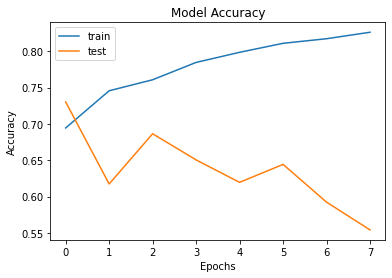

In [21]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()
